In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [3]:
# importing Dataset

data_set = pd.read_csv('medical_cost_insurance.csv')

In [4]:
df = pd.DataFrame(data_set)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
print(df.shape)

(1338, 7)


In [9]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
df['region'].value_counts().sort_values()

region
northeast    324
southwest    325
northwest    325
southeast    364
Name: count, dtype: int64

In [11]:
df['children'].value_counts().sort_values()

children
5     18
4     25
3    157
2    240
1    324
0    574
Name: count, dtype: int64

In [12]:
data = {'sex' : {'male' : 0, 'female' : 1}, 'smoker' : {'no' : 0, 'yes' : 1}, 
        'region' : {'northwest' : 0, 'northeast' : 1, 'southeast' : 2, 'southwest' : 3 }
         }
df_copy = df.copy()
df_copy.replace(data, inplace = True)

In [13]:
df_copy.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.204783,1.514948,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.105572,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


<Axes: >

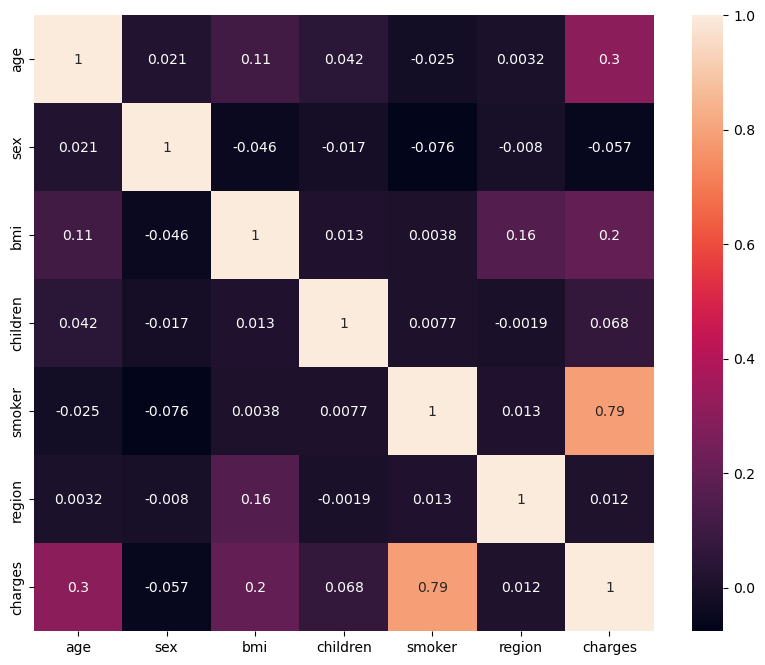

In [14]:
corr = df_copy.corr()
fig,ax = plt.subplots(figsize = (10,8))
sns.heatmap(corr,annot = True)

In [15]:
print(df['sex'].value_counts().sort_values())
print(df['smoker'].value_counts().sort_values())
print(df['region'].value_counts().sort_values())

sex
female    662
male      676
Name: count, dtype: int64
smoker
yes     274
no     1064
Name: count, dtype: int64
region
northeast    324
southwest    325
northwest    325
southeast    364
Name: count, dtype: int64


<Axes: title={'center': 'Age Vs Charges'}, xlabel='age', ylabel='charges'>

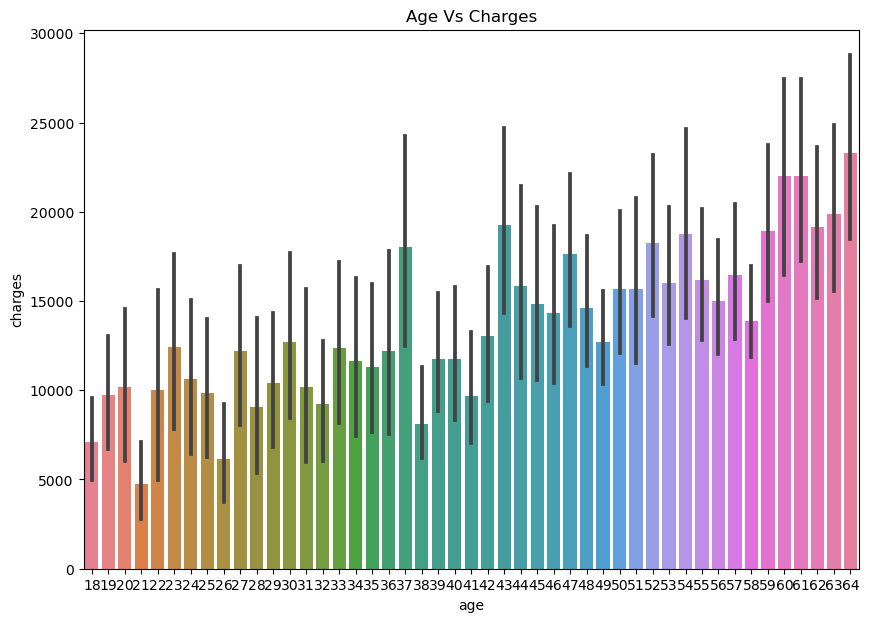

In [16]:
plt.figure(figsize = (10,7))
plt.title('Age Vs Charges')
sns.barplot(x = 'age', y = 'charges', data = df_copy, palette = 'husl')

<Axes: title={'center': 'Region Vs Charges'}, xlabel='region', ylabel='charges'>

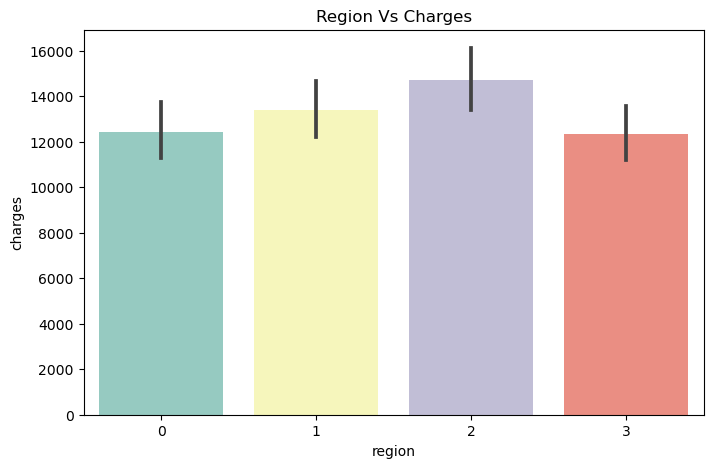

In [17]:
plt.figure(figsize = (8,5))
plt.title('Region Vs Charges')
sns.barplot(x = 'region', y = 'charges', data = df_copy, palette = 'Set3')

<Axes: title={'center': 'BMI Vs Charges'}, xlabel='bmi', ylabel='charges'>

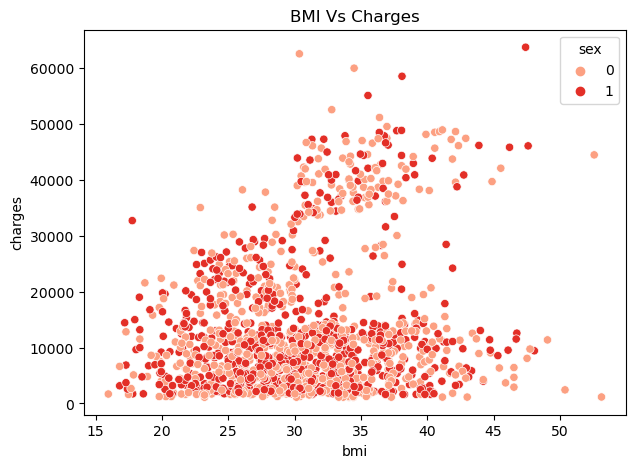

In [18]:
plt.figure(figsize = (7,5))
plt.title('BMI Vs Charges')
sns.scatterplot(x = 'bmi', y = 'charges', hue = 'sex', data = df_copy, palette = 'Reds')

<Axes: title={'center': 'Smoker Vs Charges'}, xlabel='smoker', ylabel='charges'>

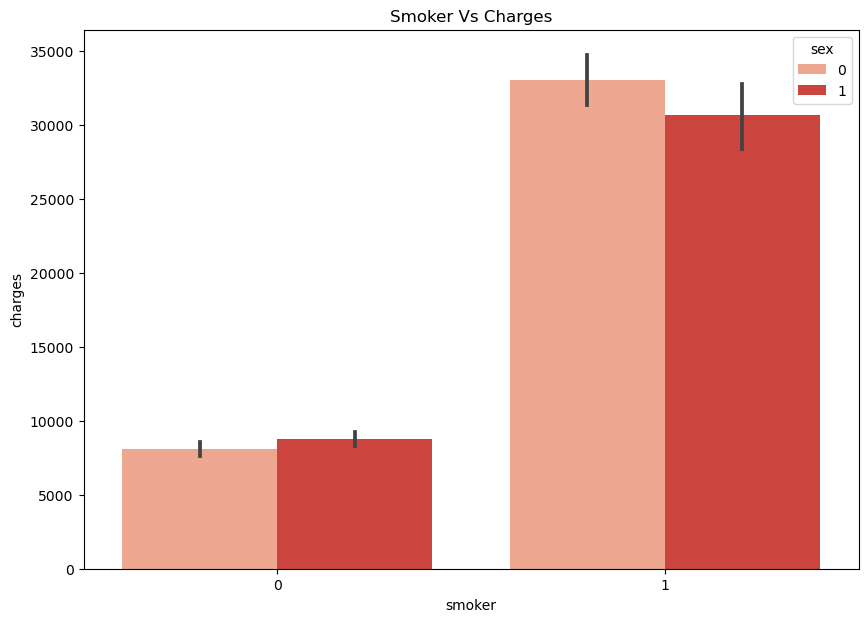

In [19]:
plt.figure(figsize = (10,7))
plt.title('Smoker Vs Charges')
sns.barplot(x = 'smoker', y = 'charges', hue = 'sex', data = df_copy, palette = 'Reds')

<Axes: title={'center': 'Sex Vs Charges'}, xlabel='sex', ylabel='charges'>

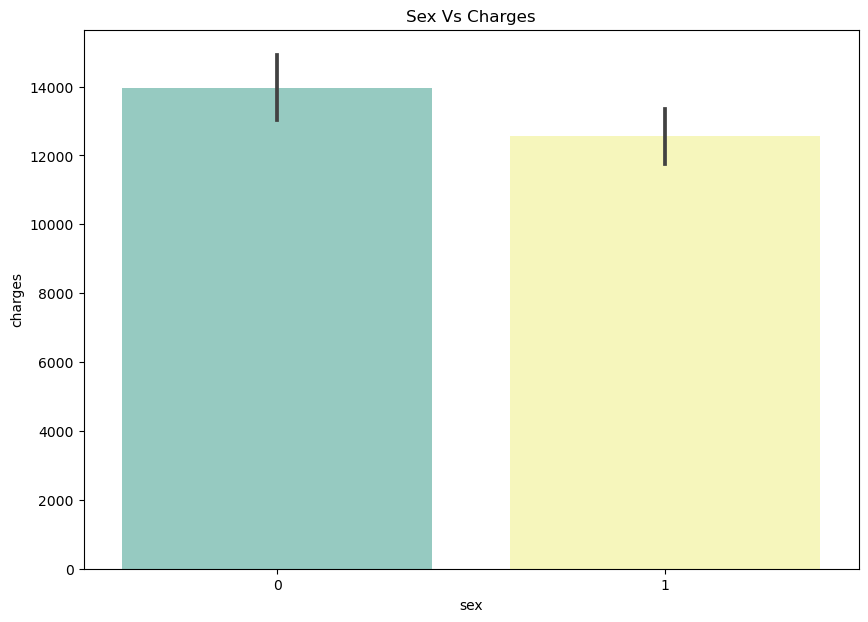

In [20]:
plt.figure(figsize = (10,7))
plt.title('Sex Vs Charges')
sns.barplot(x = 'sex', y = 'charges', data = df_copy, palette = 'Set3')

In [21]:
print('Printing Skewness and Kurtosis For All Columns')
print()
for i in list(df_copy.columns):
    print('{0} : Skewness {1:.3f} and Kurtosis {2:.3f}'.format(i, df_copy[i].skew(), df_copy[i].kurt()))

Printing Skewness and Kurtosis For All Columns

age : Skewness 0.056 and Kurtosis -1.245
sex : Skewness 0.021 and Kurtosis -2.003
bmi : Skewness 0.284 and Kurtosis -0.051
children : Skewness 0.938 and Kurtosis 0.202
smoker : Skewness 1.465 and Kurtosis 0.146
region : Skewness -0.038 and Kurtosis -1.329
charges : Skewness 1.516 and Kurtosis 1.606


Text(0, 0.5, 'count')

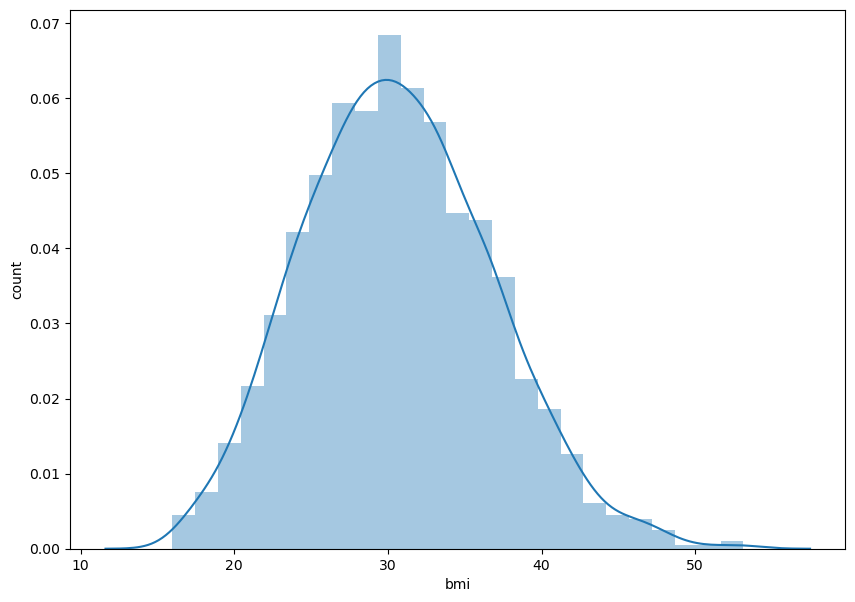

In [22]:
plt.figure(figsize = (10,7))
sns.distplot(df_copy['bmi'])
plt.xlabel('bmi')
plt.ylabel('count')

Text(0, 0.5, 'count')

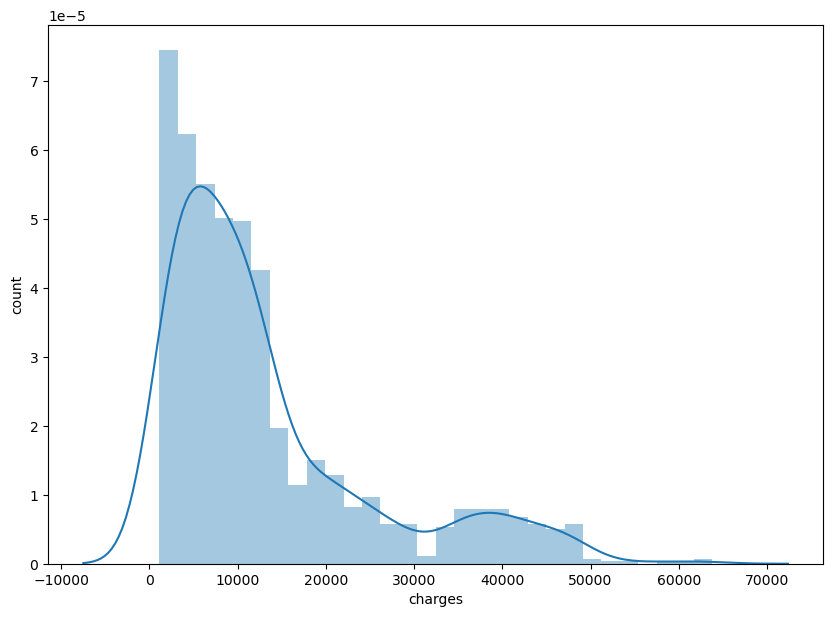

In [23]:
plt.figure(figsize = (10,7))
sns.distplot(df_copy['charges'])
plt.xlabel('charges')
plt.ylabel('count')

Text(0, 0.5, 'count')

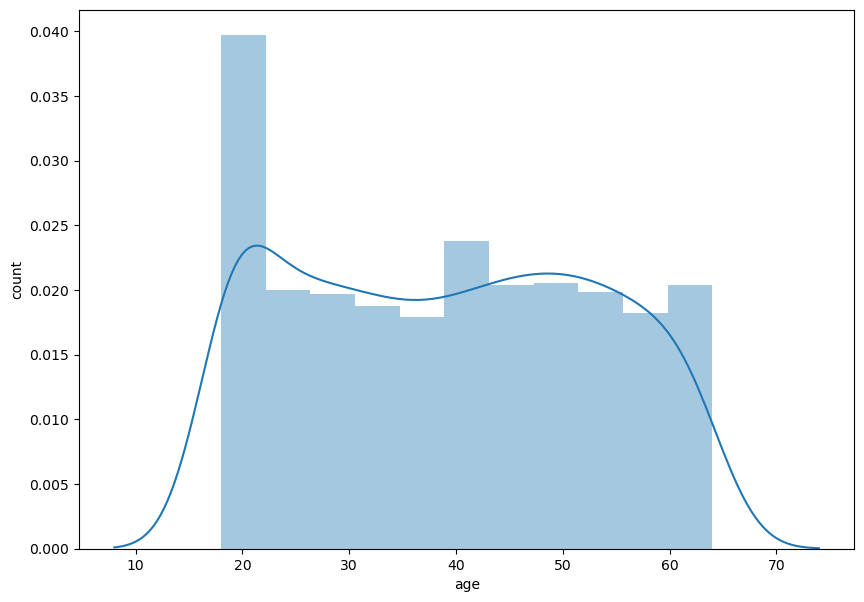

In [24]:
plt.figure(figsize = (10,7))
sns.distplot(df_copy['age'])
plt.xlabel('age')
plt.ylabel('count')

In [25]:
from sklearn.preprocessing import StandardScaler
pre_df = df_copy.copy()
Bmi = pre_df.bmi
Bmi = Bmi.values.reshape(-1,1)
pre_df['bmi'] = StandardScaler().fit_transform(Bmi)

Age = pre_df.age
Age = Age.values.reshape(-1,1)
pre_df['age'] = StandardScaler().fit_transform(Age)

Charges = pre_df.charges
Charges = Charges.values.reshape(-1,1)
pre_df['charges'] = StandardScaler().fit_transform(Charges)

pre_df.head()

,age,sex,bmi,children,smoker,region,charges
0,-1.438764,1,-0.453320,0,1,3,0.298584
1,-1.509965,0,0.509621,1,0,2,-0.953689
2,-0.797954,0,0.383307,3,0,2,-0.728675
3,-0.441948,0,-1.305531,0,0,0,0.719843
4,-0.513149,0,-0.292556,0,0,0,-0.776802


In [26]:
X = pre_df.drop('charges', axis = 1).values
Y = pre_df['charges'].values.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

print('Size of x_train : ', x_train.shape)
print('Size of y_train : ', y_train.shape)
print('Size of x_test : ', x_test.shape)
print('Size of y_test : ', y_test.shape)

Size of x_train :  (1070, 6)
Size of y_train :  (1070, 1)
Size of x_test :  (268, 6)
Size of y_test :  (268, 1)


In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV

In [28]:
%%time
Linear_reg = LinearRegression()
Linear_reg.fit(x_train, y_train)

CPU times: total: 31.2 ms
Wall time: 118 ms


LinearRegression()

In [29]:
linear_reg = cross_val_score(estimator = Linear_reg, X = X, y = Y, cv = 10)
Y_pred_train = Linear_reg.predict(x_train)
r2_score_train = r2_score(y_train, Y_pred_train)
Y_pred_test = Linear_reg.predict(x_test)
r2_score_test = r2_score(y_test, Y_pred_test)
Linear = (np.sqrt(mean_squared_error(y_test, Y_pred_test)))

print('CV Linear Regression : {0:.3f}'.format(linear_reg.mean()))
print('R2 Score (Train) : {0:.3f}'.format(r2_score_train))
print('R2 Score (Test) : {0:.3f}'.format(r2_score_test))
print('RMSE : {0:.3f}'.format(Linear))

CV Linear Regression : 0.745
R2 Score (Train) : 0.741
R2 Score (Test) : 0.783
RMSE : 0.480


In [30]:
x_c = df_copy.drop('charges', axis = 1).values
y_c = pre_df['charges'].values.reshape(-1,1)

x_train_c, x_test_c, y_train_c, y_test_c = train_test_split(x_c, y_c, test_size = 0.2, random_state = 42)

x_train_scaled = StandardScaler().fit_transform(x_train_c)
y_train_scaled = StandardScaler().fit_transform(y_train_c)
x_test_scaled = StandardScaler().fit_transform(x_test_c)
y_test_scaled = StandardScaler().fit_transform(y_test_c)

svr = SVR()

In [32]:
parameters = {'kernel' : ['rbf', 'sigmoid'],
              'gamma' : [0.001, 0.01, 0.1, 1, 'scale'],
              'tol' : [0.0001],
              'C' : [0.001, 0.01, 0.1, 1, 10, 100]}
Svr = GridSearchCV(estimator = svr, param_grid = parameters, cv = 10, verbose = 4, n_jobs = -1)
Svr.fit(x_train_scaled, y_train_scaled.ravel())

Fitting 10 folds for each of 60 candidates, totalling 600 fits


GridSearchCV(cv=10, estimator=SVR(C=10, gamma=1, tol=0.0001), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 'scale'],
                         'kernel': ['rbf', 'sigmoid'], 'tol': [0.0001]},
             verbose=4)

In [33]:
svr = SVR(C = 10, gamma = 1, tol = 0.0001)
svr.fit(x_train_scaled, y_train_scaled.ravel())
print(Svr.best_estimator_)
print(Svr.best_score_)

SVR(C=10, gamma=0.1, tol=0.0001)
0.8311283388933977


In [34]:
cv_svr = Svr.best_score_
y_pred_svr_train = svr.predict(x_train_scaled)
r2_score_svr_train = r2_score(y_train_scaled, y_pred_svr_train)

y_pred_svr_test = svr.predict(x_test_scaled)
r2_score_svr_test = r2_score(y_test_scaled, y_pred_svr_test)

rmse_svr = (np.sqrt(mean_squared_error(y_test_scaled, y_pred_svr_test)))

print('CV : {0:.3f}'.format(cv_svr.mean()))
print('R2 Score (Train) : {0:.3f}'.format(r2_score_svr_train))
print('R2 Score (Test) : {0:.3f}'.format(r2_score_svr_test))
print('RMSE : {0:.3f}'.format(rmse_svr))

CV : 0.831
R2 Score (Train) : 0.948
R2 Score (Test) : 0.728
RMSE : 0.521


In [35]:
reg_rf = RandomForestRegressor()
parameters = { 'n_estimators':[600,1000,1200],
             'max_depth':[40,50,60],
             'min_samples_split': [5,7,9],
             'min_samples_leaf': [7,10,12],
             'criterion': ['friedman_mse']}

reg_rf_gscv = GridSearchCV(estimator=reg_rf, param_grid=parameters, cv=10, n_jobs=-1)
reg_rf_gscv = reg_rf_gscv.fit(x_train_scaled, y_train_scaled.ravel())

In [36]:
reg_rf_gscv.best_score_, reg_rf_gscv.best_estimator_

(0.8483143577099458,
 RandomForestRegressor(criterion='friedman_mse', max_depth=40,
                       min_samples_leaf=12, min_samples_split=5,
                       n_estimators=600))

In [37]:
rf_reg = RandomForestRegressor(max_depth = 40, min_samples_leaf = 12, min_samples_split = 9, n_estimators = 900)
rf_reg.fit(x_train_scaled, y_train_scaled.ravel())

RandomForestRegressor(max_depth=40, min_samples_leaf=12, min_samples_split=9,
                      n_estimators=900)

In [38]:
cv_rf = reg_rf_gscv.best_score_

y_pred_rf_train = rf_reg.predict(x_train_scaled)
r2_score_rf_train = r2_score(y_train_scaled, y_pred_rf_train)

y_pred_rf_test = rf_reg.predict(x_test_scaled)
r2_score_rf_test = r2_score(y_test_scaled, y_pred_rf_test)

rmse_rf = (np.sqrt(mean_squared_error(y_test_scaled, y_pred_rf_test)))

print('CV : {0:.3f}'.format(cv_rf.mean()))
print('R2 Score (Train) : {0:.3f}'.format(r2_score_rf_train))
print('R2 Score (Test) : {0:.3f}'.format(r2_score_rf_test))
print('RMSE : {0:.3f}'.format(rmse_rf))

CV : 0.848
R2 Score (Train) : 0.884
R2 Score (Test) : 0.879
RMSE : 0.348


In [44]:
models = [('Linear Regression', Linear, r2_score_train, r2_score_test, linear_reg.mean()),
          ('Support Vector Regression', rmse_svr, r2_score_svr_train, r2_score_svr_test, cv_svr.mean()),
          ('Random Forest Regression', rmse_rf, r2_score_rf_train, r2_score_rf_test, cv_rf.mean())]

In [45]:
predict = pd.DataFrame(data = models, columns = ['Model', 'RMSE', 'R2_score(training)', 'R2_score(test)', 'Cross-Validation'])
predict

,Model,RMSE,R2_score(training),R2_score(test),Cross-Validation
0,Linear Regression,0.479808,0.741410,0.782694,0.744528
1,Support Vector Regression,0.521282,0.947629,0.728265,0.831128
2,Random Forest Regression,0.347837,0.884496,0.879010,0.848314


<function matplotlib.pyplot.show(close=None, block=None)>

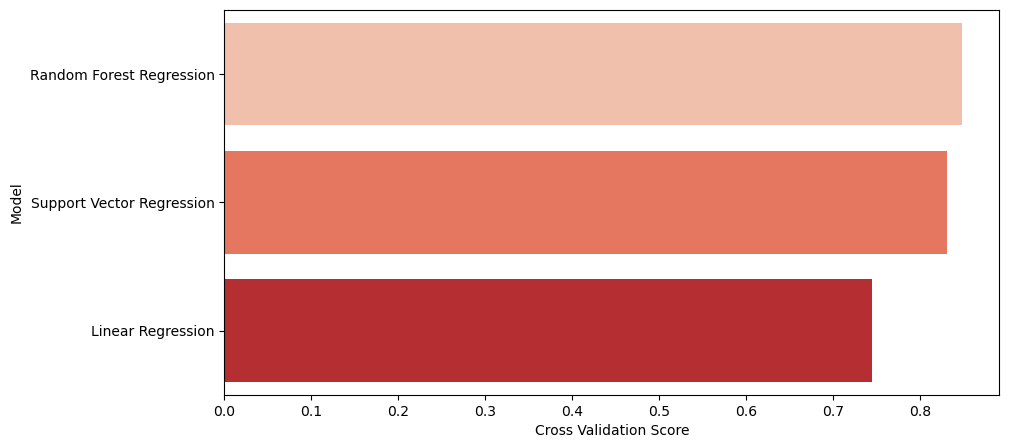

In [47]:
plt.figure(figsize = (10,5))
predict.sort_values(by = ['Cross-Validation'], ascending = False, inplace = True)

sns.barplot(x = 'Cross-Validation', y = 'Model', data = predict, palette = 'Reds')
plt.xlabel('Cross Validation Score')
plt.ylabel('Model')
plt.show

In [58]:
df_copy.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,0,21984.47061
4,32,0,28.880,0,0,0,3866.85520


In [62]:
X_ = pre_df.drop('charges', axis = 1).values
Y_ = pre_df['charges'].values.reshape(-1,1)

x_train_, x_test_, y_train_, y_test_ = train_test_split(X_, Y_, test_size = 0.2, random_state = 42)

print('Size of x_train_ : ', x_train_.shape)
print('Size of y_train_ : ', y_train_.shape)
print('Size of x_test_ : ', x_test_.shape)
print('Size of y_test_ : ', y_test_.shape)

Size of x_train_ :  (1070, 6)
Size of y_train_ :  (1070, 1)
Size of x_test_ :  (268, 6)
Size of y_test_ :  (268, 1)


In [70]:
rf_reg = RandomForestRegressor(max_depth = 50, min_samples_leaf = 12, min_samples_split = 7, n_estimators = 1200)
rf_reg.fit(x_train_, y_train_.ravel())

RandomForestRegressor(max_depth=50, min_samples_leaf=12, min_samples_split=7,
                      n_estimators=1200)

In [72]:
y_pred_rf_train_ = rf_reg.predict(x_train_)
r2_score_rf_train_ = r2_score(y_train_, y_pred_rf_train_)

y_pred_rf_test_ = rf_reg.predict(x_test_)
r2_score_rf_test_ = r2_score(y_test_, y_pred_rf_test_)

print('R2 Score (Train) : {0:.3f}'.format(r2_score_rf_train_))
print('R2 Score (Test) : {0:.3f}'.format(r2_score_rf_test_))

R2 Score (Train) : 0.885
R2 Score (Test) : 0.878


In [73]:
import pickle

File = 'medical_cost.pkl'

with open(File, 'wb') as file:
    pickle.dump(rf_reg, file)

In [74]:
with open(File, 'rb') as file:
    rf_file = pickle.load(file)
    
rf_file

RandomForestRegressor(max_depth=50, min_samples_leaf=12, min_samples_split=7,
                      n_estimators=1200)

In [75]:
final_pred = rf_file.predict(np.array([20, 1, 28, 0, 1, 3]).reshape(1, 6))[0]
print('{0:.3f}'.format(final_pred))

2.807


In [76]:
import joblib
joblib.dump(final_pred, 'Medical_cost_insurance')

['Medical_cost_insurance']